# Содержание

1. [Изучение данных](#info_id)
2. [Метрики](#product_metrics)
    1. [Продуктовые метрики](#product_metrics)
    2. [Метрики электронной коммерции](#commercial_metrics)
    3. [Маркетинговые метрики](#marketing_metrics)
3. [Общий вывод](#fin)


<a id='info_id'></a>
## Изучение данных
***
**to do:**
1. Импортируем необходимые библиотеки
2. Прочитаем данные
3. Проверим:
    - пропуски;
    - дубликаты;
    - не соответствие типов данных;
4. Сделаем вывод.

    

In [ ]:
# Основные библиотеки
import pandas as pd
import numpy as np

# Библиотеки визуализации
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import plotly.graph_objects as go
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


#import warnings
#warnings.filterwarnings('ignore')

Напишем функцию для вывода первичной информации о данных.  
Для удобства функцию будем применять не через цикл, а отдельно для каждого датасета.

In [ ]:
# Функция для вывода необходимой информации для первичной проверки данных
# Включает в себя: Общую информацию о датасете, описательную статистику и количество дублей
def check_data (df):  
  print('ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ'),\
  print('----------------------------------------'),\
  df.info(),\
  print(''),\
  print('ОПИСАТЕЛЬНАЯ СТАТИСТИКА'),\
  print('----------------------------------------'),\
  print(df.describe()),\
  print('----------------------------------------'),\
  print(''),\
  print('КОЛИЧЕСТВО ДУБЛИКАТОВ:', df.duplicated().sum())

**Проверка таблицы с визитами**
***

In [ ]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
check_data(df_visits)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19
----------------------------------------

КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


Из вводных задачи нам известно, что в таблице с визитами есть данные по исчтоникам трафика и устройства, с которого заходил пользователь. Изучим эти данные.

In [ ]:
df_visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Итак, пользователи сайта заходят либо с гадежтов *(телефон, планшет)*, либо с ПК.  
Таким образом мы можем перевести тип данных этой переменной из `object` в `category` - в первую очередь мы сэкономим память.  
Стоит отметить, что на сайт большиснтво выходят именно с ПК - 73 % от общей доли.


Изучим источники трафиков.

In [ ]:
session_by_source = df_visits.pivot_table(index='Source Id',
                                       values = 'Uid',
                                       aggfunc='count').reset_index().sort_values(by='Uid', ascending=False)

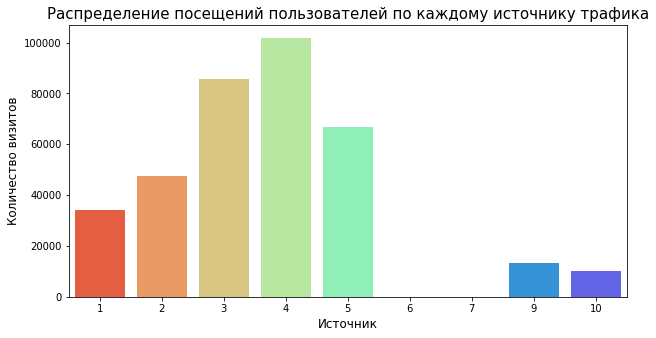

In [ ]:
# График распределния посещений ользователей по источникам трафика
line,ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x ='Source Id',
                 y ='Uid',
                 data = session_by_source,
                 palette="rainbow_r")
ax.set_title('Распределение посещений пользователей по каждому источнику трафика', fontsize=15)
ax.set_xlabel ('Источник' , fontsize=12)
ax.set_ylabel ('Количество визитов', fontsize=12)
plt.show()

Итого мы имеем девять  источников трафика:
- четыре из которых имеют очень малое количество визитов - до 20000. Это 6,7,9 и 10 источники.
- два имеют среднее количество визитов - до 50000. Это 1 и 2 источники.
- и топовые источники с количеством визитов более 60000. Это 3,4 и5 источники

Доплнительно проверим границы наших сессий.  
В условии задачи сказано, что данные за период июнь 2017 г. по конец мая 2018 г.  
Проверим это.

In [ ]:
print('Самая первая дата посещения сайта: {}'.format(df_visits['Start Ts'].min()))
print('Самая последняя дата посещения сайта: {}'.format(df_visits['Start Ts'].max()))

Самая первая дата посещения сайта: 2017-06-01 00:01:00
Самая последняя дата посещения сайта: 2018-05-31 23:59:00


Подтверждено, исследуемый период с начало июня 2017 г. до конца мая 2018 г.

**Проверка таблицы с заказами**
***

In [ ]:
df_orders.sample(5)

,Buy Ts,Revenue,Uid
37651,2018-03-01 22:13:00,1.22,6843907841610612722
10773,2017-10-05 11:44:00,12.22,6511109216931812654
48718,2018-05-24 00:08:00,3.05,14125185767578630661
32927,2018-02-04 18:19:00,5.50,7071581902388702082
35388,2018-02-17 15:48:00,2.75,5789707840212474971


In [ ]:
check_data(df_orders)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19
----------------------------------------

КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


**Проверка таблицы с расходами**
***


In [ ]:
df_costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [ ]:
check_data(df_costs)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000
----------------------------------------

КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


### Вывод
***
Мы провели первичный анализ данных и выяснили следующее:

1. Пропусков и дубликатов в таблицах нет.
2. Тип данных в колонках с датами - `object` необходимо перевести в `datetime`.  
Поле `device` переведем в категориальный тип данных.
3. В таблице с заказами, есть нулевые значения по сумме заказов.  
Количество строк с нуями не определеляось.  
Анализ влияния будем проводить на этапе, когда эти данные будут использоваться.  
Пока что держим в уме.
4. В таблицах `df_visits` и `df_orders` названия столбцов в верхнем регистре.  
Эстетики ради приведем их в единый стиль - *snake_case*
5. Мы изучили состав источников трафика и и устройств, с которого были осуществлены посещения сайта. Определили топовые и антитоповые позиции. 
6. Дополнительно удостоверились в границах исследуемого периода.

Форматирование названия столбцов

In [ ]:
df_visits.columns = df_visits.columns.str.lower().str.replace(' ', '_')
df_orders.columns = df_orders.columns.str.lower().str.replace(' ', '_')

print(df_visits.columns)
print(df_orders.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')


Переведем дату начало и окончания сессии из формата `object` в `datetime`.

In [ ]:
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'] )
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

Переведем данные в поле `device` в категориальный тип данных

In [ ]:
df_visits['device'] = df_visits['device'].astype('category')

## Метрики

<a id='product_metrics'></a>
### Продуктовые метрики
***
**to do:**  
1. Рассчитаем количетсво новых пользовтелей за: *день, неделю, месяц*
2. Опеределим сколько пользователей в среднем в день заходят в сервис.
3. Определение продолжительности средней сессии.
4. Рассчет коэффициента удержания.

**Количество новых пользователей**

Выделим неделю, месяц, год. 

In [ ]:
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_week'] = df_visits['start_ts'].astype('datetime64[W]')
df_visits['session_month'] = df_visits['start_ts'].astype('datetime64[M]')
df_visits['session_year'] = df_visits['start_ts'].dt.year

Расчитаем метрик: dau, wau, mau.  


In [ ]:
dau_total = df_visits.groupby('session_date').agg({'uid':'nunique'}).reset_index()
wau_total = df_visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()
mau_total = df_visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()

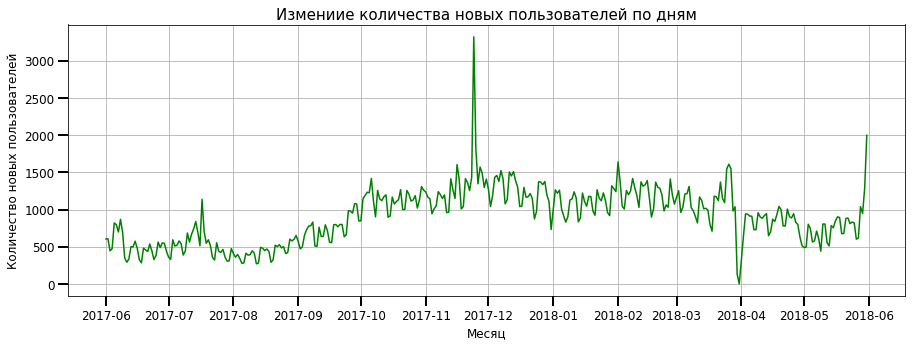

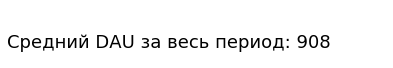

In [ ]:
# Создание фигуры
fig, axes1 = plt.subplots(figsize=(15, 5))

# График изменения количества новых пользователей по дням
axes1.plot('session_date', 'uid', data=dau_total, color='green')
axes1.set_title('Измениие количества новых пользователей по дням', fontsize=15)
axes1.set_xlabel('Месяц', fontsize = 12)
axes1.set_ylabel('Количество новых пользователей', fontsize = 12)
axes1.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)

# Вывод диапазона значений по оси X c интервалом в 1 месяц
fmt_year = mdates.MonthLocator(interval=1)
axes1.xaxis.set_major_locator(fmt_year)
axes1.grid()

# Вывод среднего показателя DAU
fig, axes2 = plt.subplots(1,1, figsize=(1,1))
axes2.set_axis_off()
axes2.text(0, 0.5, 'Средний DAU за весь период: {:.0f}'.format(dau_total['uid'].mean()), fontsize = 18, horizontalalignment = 'right', verticalalignment='top')
plt.show()


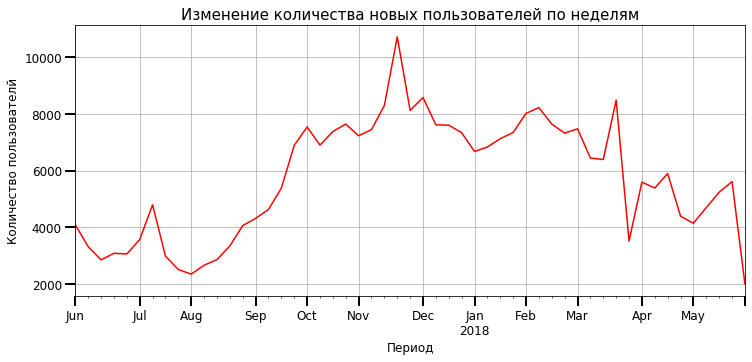

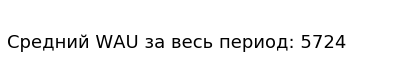

In [ ]:
# График изменения количества новых пользователей по неделям
df_visits.groupby('session_week')['uid'].nunique().plot(figsize=(12,5), color='red')
plt.title('Изменение количества новых пользователей по неделям', fontsize=15)
plt.xlabel('Период',  fontsize=12)
plt.ylabel('Количество пользователй', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.grid()
plt.show()

# Вывод среднего показателя WAU
fig, axes = plt.subplots(1,1, figsize=(1,1))
axes.set_axis_off()
axes.text(0, 0.5, 'Средний WAU за весь период: {:.0f}'.format(wau_total['uid'].mean()), fontsize = 18, horizontalalignment = 'right', verticalalignment='top')
plt.show()

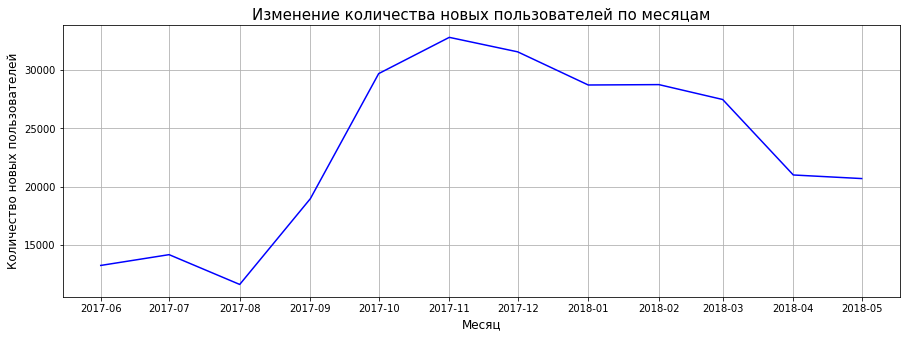

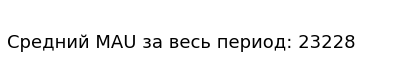

In [ ]:
# Создаем фигуру
fig, axes1 = plt.subplots(figsize=(15, 5))

# График изменения количества новых пользователей по месяцам
axes1.set_title('Изменение количества новых пользователей по месяцам', fontsize=15)
axes1.plot('session_month', 'uid', data = mau_total, color='blue')
axes1.set_xlabel('Месяц', fontsize = 12)
axes1.set_ylabel('Количество новых пользователей', fontsize = 12)

# Вывод диапазона значений по оси X c интервалом в 1 месяц
fmt_year = mdates.MonthLocator(interval=1)
axes1.xaxis.set_major_locator(fmt_year)
axes1.grid()

# Вывод среднего показателя MAU
fig, axes = plt.subplots(1,1, figsize=(1,1))
axes.set_axis_off()
axes.text(0, 0.5, 'Средний MAU за весь период: {:.0f}'.format(mau_total['uid'].mean()), fontsize = 18, horizontalalignment = 'right', verticalalignment='top')
plt.show()

Выполним проверку степени вовлеченности наших пользователей.  
Определим отношение уникальных пользователей в течении дня, к числу уникальных пользователей в течении недели и месяца.

In [ ]:
print('Sticky Factor за неделю: {}%'.format(round((dau_total['uid'].mean() / wau_total['uid'].mean()) *100)))
print('Sticky Factor за месяц: {}%'.format(round((dau_total['uid'].mean() / mau_total['uid'].mean()) *100)))

Sticky Factor за неделю: 16%
Sticky Factor за месяц: 4%


По оценкам экспертов средний показатель регулярности посещения в месяц находится на отметке 20%. Наш составил 4% - это практически минимальное значение, для наших DAU и MAU, ии означает следующее - старые пользователи, в большинстве своем не посещают на сайт в течении месяца.

**Вывод**
***

1. В день, в среднем появляется 908 новых пользователей.  
Динаимика относительно ровная, начиная с сентября 2017 г. показатель вырос с 500 до 1000 и держался на этом уровне до апреля 2018 г.  
Самое большое прибавление новых пользователей  в день было в ноябре 2017 г. - свыше 3000 пользователей.
Самое низкое количество приходов в день было в апреле 2018 г. - ниже 500.


2. Если оценивать показатель приходов по неделям и месяцам то :  
    - **в неделю** сервис приобретает 5724 новых пользователей;
    - **в месяц**  сервис приобретает 23228 новых пользователей; 

На обоих графиках отмечается рост пользователей наичная с август 2017 г. и заканчивая апреля 2018 г.

Из вышесказанного можно выделить период, в котором пришло много пользователей - это осень, зима. То есть периоды, в которых снижается курортная активность.  
Люди наичнают больше посещать: театры, выставки, концерты. Что означает пользование сервисом Яндекс.Афиша.

**Посещаемость**

Сгруппируем данные по месяцу и дате для определения количество пользователй на каждый день.  
Далее, посчитаем средню с укрепнением до месяца.

In [ ]:
daily_visits = df_visits.pivot_table(index = 'session_date',
                                     values='uid',
                                     aggfunc=({'uid':['count', 'nunique']})).reset_index()
daily_visits = daily_visits.rename(columns={'count':'n_sessions', 'nunique':'n_users'})

In [ ]:
daily_visits['avg_n_sessions'] = daily_visits['n_sessions'] / daily_visits['n_users']

Отобразим изменения среднего количества посещений в день из месяца в месяц

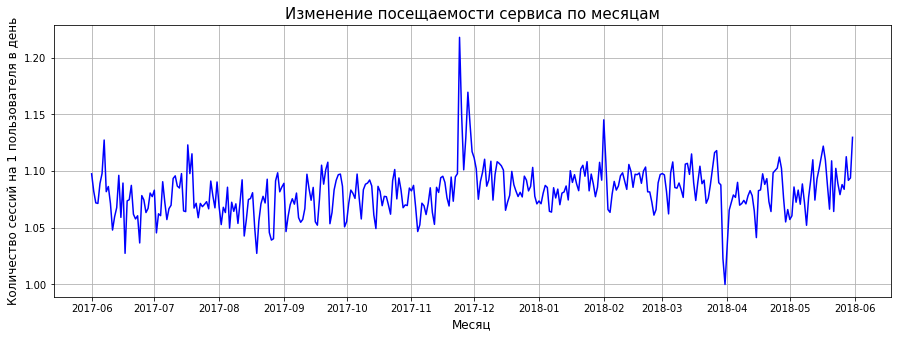

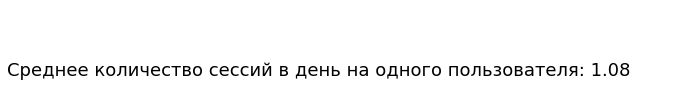

In [ ]:
# Создаем фигуру
fig, axes1 = plt.subplots(figsize=(15, 5))


# График изменения количества посещений по месяцам
axes1.set_title('Изменение посещаемости сервиса по месяцам', fontsize=15)
axes1.plot('session_date', 'avg_n_sessions', data = daily_visits, color='blue')
axes1.set_xlabel('Месяц', fontsize = 12)
axes1.set_ylabel('Количество сессий на 1 пользователя в день', fontsize = 12)

# Вывод диапазона значений по оси X c интервалом в 1 месяц
fmt_year = mdates.MonthLocator(interval=1)
axes1.xaxis.set_major_locator(fmt_year)
axes1.grid()

# Вывод среднего количеста посещений за весь период
fig, axes2 = plt.subplots(1,1, figsize=(1,1))
axes2.set_axis_off()
axes2.text(0, 0, 'Среднее количество сессий в день на одного пользователя: {:.2f}'.format(daily_visits['avg_n_sessions'].mean()), fontsize = 18, horizontalalignment = 'right', verticalalignment='top')
plt.show()



**Вывод**
***
1. В среднем, в день, один пользователь совершает 1.08 сессий.
2. Динамика изменения от месяца к месяцу ровная, за исключением ноября 2017 г.  
В этот период среднее количество сессий выросло на 16% и составило 1.23
3. Обратная ситуация возникла в апреле 2018 г. В среднем пользвотель посещал сайт 1 раз, показетль снизился на 10%. 


**Продолжительность сессии**

Переведем начало сессии и ее конец в формат `datetime`

1. Определим длительность сессии.
2. Проверим ее распределение для опеределния меры центральной тенденции.

In [ ]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

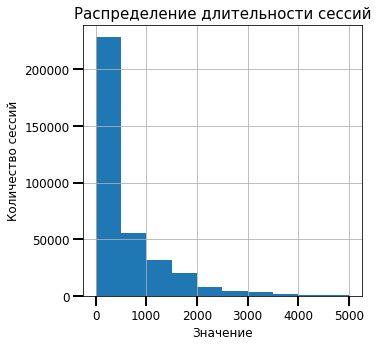

In [ ]:
# График распределения длительности сессий
df_visits['session_duration_sec'].hist(figsize=(5,5), range=(0,5000))
plt.title('Распределение длительности сессий', fontsize=15)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Количество сессий', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.show()

Распределение не нормальное - большинство сессий *(56% от общего числа)* короткие *(до 15 минут)*, также есть выбросы, которые искажают среднюю.
Для определения средней продолжительности сессии возьмем самое распространенное значение.

In [ ]:
df_visits['session_duration_sec'].mode()

0    60
dtype: int64

**Вывод**
***
Средняя продолжительность сессии составляет - 60 секунд.  
Для сервиса покупки билетов это маленькое значнеие.  
Можно предположить несколько версий:
1. Большинство пользователей заходят на сайт и сразу осущевляют покупку, нежели читают афиши, смотрят расписание. То есть они знают то, что покупают.
2. Большинство пользователей заходят на сайт для поиска билетов на конкретное мероприятие. Далее пользователь не обязательно совершает покупку. Для него важно увидеть: где, когда, во-сколько, цена.



**Удержание пользователей**

Определим дату самого первого посщения пользователя, чтобы потом отследить его повторный визит.

In [ ]:
first_activity_date = df_visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
first_activity_date.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_activity_date, dtype: datetime64[ns]

Соединим полученные данные с основным датасетом.

In [ ]:
df_visits = df_visits.join(first_activity_date, on='uid')

In [ ]:
df_visits['first_activity_month'] = df_visits['first_activity_date'].astype('datetime64[M]')

Найдем lifetime когорты.

In [ ]:
# Находим разность во врмени между текущей и первой датой визита
df_visits['cohort_lifetime'] = df_visits['session_month'] - df_visits['first_activity_month']
# Выражаем интервал кратно месяцу.
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'] / np.timedelta64(1, 'M')
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype('int')

In [ ]:
df_visits['cohort_lifetime'].head()

0    0
1    0
2    0
3    2
4    0
Name: cohort_lifetime, dtype: int64

1. Определим количество пользователей на каждый lifetime, в данном случае на каждый месяц;
2. Определим сколько пользователей было в их первое посещение;
3. Посчитаем коэффициент удержания.


In [ ]:
cohorts = df_visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [ ]:
# Определяем количество пользователей в их первый период жизни
initial_uid_count = cohorts[cohorts['cohort_lifetime'] == 0] [['first_activity_month', 'uid']]
initial_uid_count = initial_uid_count.rename(columns = {'uid':'cohort_uid'})

In [ ]:
cohorts = cohorts.merge(initial_uid_count, on='first_activity_month')

In [ ]:
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_uid
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Расчет Retention Rate

In [ ]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_uid'] 

Для наглядной визуалиации, в обозначениях когорты отбросим число, оставим только год и месяц

In [ ]:
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m') 

In [ ]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum') 

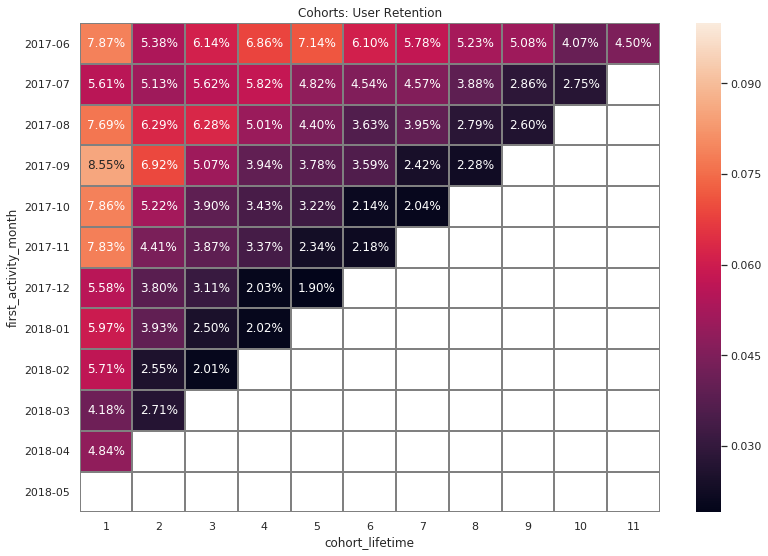

In [ ]:
# Тепловая карта отобржаение суммарного коэффициента удержания по "времени жизни"
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.loc[:, 1:11], annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmax=0.1);

Найдем средний показатель удержания за 2 месяц жизни когорт

In [ ]:
print('Cредний Retention Rate на второй месяц «жизни» когорт: {:.2f} %'.format(retention_pivot[1].mean() * 100))

Cредний Retention Rate на второй месяц «жизни» когорт: 6.52 %


**Вывод**
***
**Коэффициент удержания** очень низкий.  
На второй месяц жизни, в среднем составляет 6.52 % *(из 100 возвращаются только 7 пользователей)* и имеет тенденцию снижения.  
Чем дальше от первого месяца посещения, тем ниже.  
Исключением можно отметить июнь 2017, спустя 5 месяцев, количесвто вторичных посещений в этой кагорте было больше чем в остальные месяцы посещения. 
 
Напомним, что мы строили кагорты по месяцам, и для сайта Яндекс.Афиша такой показатель объясним:  
- Сайт осуществляет продажу билетов на мероприятия. Посещение мероприятий более чем раз в месяц скорее будет исключением, нежели постоянным событием.
- Как вариант можно предположить то, что первичное посещение было завышено. Например покупкой билета на крупный концерт зарубежного исполнителя. Такие события редкие и массовые, а значит орда людей купили билеты через сайт и более не возвращались.  


<a id='commercial_metrics'></a>
### Метрики электронной коммерции
***

**to do:**

1. Определение периода времени от первого визита до совершения первой покупки;
2. Расчет количества покупок на 1 пользователя;
3. Расчет среднего чека и его изменение во времени.
4. Оценка изменения LTV на покупателя *(пожизненная ценность клиента)* по когортам. 

**Период времени между событиями** *первое посещение* **и** *первая покупка*

1. В новом датасете объединими таблицу заказов с таблицей визитов
2. Удалим пустые значения.
2. Определим период времени, который прошел между двумя этими событиями
3. Посчитаем среднее значение.

In [ ]:
visit_in_order = pd.merge(df_visits, df_orders, on='uid', how='outer')

In [ ]:
 visit_in_order = visit_in_order.dropna().reset_index(drop=True)

In [ ]:
visit_in_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761807 entries, 0 to 761806
Data columns (total 15 columns):
device                  761807 non-null category
end_ts                  761807 non-null datetime64[ns]
source_id               761807 non-null int64
start_ts                761807 non-null datetime64[ns]
uid                     761807 non-null uint64
session_date            761807 non-null object
session_week            761807 non-null datetime64[ns]
session_month           761807 non-null datetime64[ns]
session_year            761807 non-null int64
session_duration_sec    761807 non-null int64
first_activity_date     761807 non-null datetime64[ns]
first_activity_month    761807 non-null datetime64[ns]
cohort_lifetime         761807 non-null int64
buy_ts                  761807 non-null datetime64[ns]
revenue                 761807 non-null float64
dtypes: category(1), datetime64[ns](7), float64(1), int64(4), object(1), uint64(1)
memory usage: 82.1+ MB


In [ ]:
# Опередение даты первого визита и первой покупки по каждому клиенту
time_visit_in_order = visit_in_order.pivot_table(index='uid',
                                                 values=['start_ts', 'buy_ts'],
                                                 aggfunc='min').reset_index()

In [ ]:
time_visit_in_order['duration_visit_in_order'] = time_visit_in_order['buy_ts'] - time_visit_in_order['start_ts']

Так как длительность типичной сессии составляет 1 минуту, то и оценивать длительность времени между началом сессии и покупкой будем в минутах.

In [ ]:
time_visit_in_order['duration_visit_in_order'] = time_visit_in_order['duration_visit_in_order'] / np.timedelta64(1,'m')

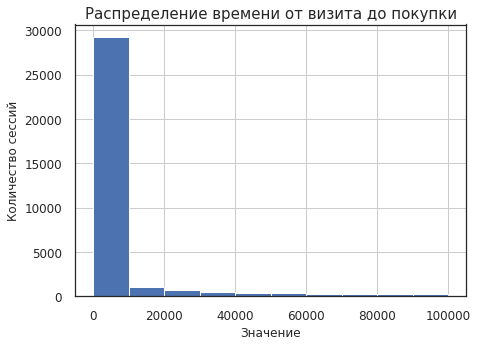

In [ ]:
# График распределения периода времени от первого визита до первой покупки
time_visit_in_order['duration_visit_in_order'].hist(range=(0,100000), figsize=(7,5))
plt.title('Распределение времени от визита до покупки', fontsize=15)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Количество сессий', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.show()

In [ ]:
time_visit_in_order['duration_visit_in_order'].mode()

0    1.0
dtype: float64

**Вывод**
***
На графике мы снова видим не нормальное распределение - большинство значений являются нулевыми.  Но есть и такие сессии, в которых время от визита до покупки составляло от 14 дней и до года.  
Исходя из распределения нами решено взять моду, как определение времени от визита до покупки - 1 минута.  
- **Нулевые значения** можно объяснить так: *для пользователя первичное посещение сайта и есть покупка билета. То есть пользователь не читает контент, он заходит на сайт с готовностью сразу купить билет* 
- **Большие значения** времени можно обяснить так: *пользователь зашел на сайт, просмотрел страницу, но покупку делал ближе к дате мероприятия, т.к. не каждый готов покупать билеты за несколько месяцев до события.*

**Количество покупок на 1 пользователя**

Выделим в дате покупки месяц.

In [ ]:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')

Определим дату первой покупки каждого клиента

In [ ]:
first_orders = df_orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Определим количество покупателей по каждому первому месяцу покупки

In [ ]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Создадим новый датасет с объединением таблицы с заказами и таблицы с месяцем первой покупки.  

In [ ]:
copy_orders = pd.merge(df_orders, first_orders, on='uid')

Определим количество покупок в разрезе первого первого месяца покупки и текущего месяца


In [ ]:
cohorts_purchases = copy_orders.groupby(['first_order_month', 'order_month']).agg({'uid':'count'}).reset_index()
cohorts_purchases.columns = ['first_order_month', 'order_month','count_purchases']
cohorts_purchases.head()

,first_order_month,order_month,count_purchases
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


Подтянем данные по количеству пользователей каждой кагорты

In [ ]:
count_purchases_by_user = cohorts_purchases.merge(cohort_sizes, on='first_order_month')

Определим возраст когорты

In [ ]:
# Определение срока жизни: разность между текущем месяцем и первым месяцем покупки. 
count_purchases_by_user['age'] = (count_purchases_by_user['order_month'] - count_purchases_by_user['first_order_month']) / np.timedelta64(1,'M')
count_purchases_by_user['age'] = count_purchases_by_user['age'].round().astype('int')
count_purchases_by_user.head()

,first_order_month,order_month,count_purchases,n_buyers,age
0,2017-06-01,2017-06-01,2354,2023,0
1,2017-06-01,2017-07-01,177,2023,1
2,2017-06-01,2017-08-01,174,2023,2
3,2017-06-01,2017-09-01,226,2023,3
4,2017-06-01,2017-10-01,292,2023,4


Определим количество покупок на 1 пользователя

In [ ]:
count_purchases_by_user['avg_count_purchases_by_user'] = count_purchases_by_user['count_purchases'] / count_purchases_by_user['n_buyers']

Вывод данных

In [ ]:
avg_count_purchases_by_user = count_purchases_by_user.pivot_table(index = 'first_order_month',
                                                                  columns = 'age',
                                                                  values = 'avg_count_purchases_by_user',
                                                                  aggfunc = 'sum')

In [ ]:
avg_count_purchases_by_user.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017-07-01,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017-08-01,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017-09-01,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017-10-01,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017-11-01,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017-12-01,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018-01-01,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018-02-01,1.12,0.06,0.02,0.02,,,,,,,,


In [ ]:
print('Количество покупок на 1 пользователя: {:.2f}'.format(avg_count_purchases_by_user.cumsum(axis=1).mean()[5]))

Количество покупок на 1 пользователя: 1.43


**Вывод**
***
1. Cреднее количество покупок на одного покупателя за 6 месяцев жизни составляет 1.43.  
Считаем это логичным - покупка билета на концерт "Slipknot", это не покупка молока каждый день. Посетить концерт мы можем раз в полгода, а то и еще реже.

**Определение среднего чека**

Изменение среднего чека во времени будем оценивать помесячно. 

In [ ]:
average_check = df_orders.groupby('order_month').agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
average_check = average_check.rename(columns = {'revenue':'revenue_sum', 'uid':'n_orders'})
average_check['average_check'] = average_check['revenue_sum'] / average_check['n_orders']
average_check.head()

,order_month,revenue_sum,n_orders,average_check
0,2017-06-01,9557.49,2354,4.060106
1,2017-07-01,12539.47,2363,5.306589
2,2017-08-01,8758.78,1807,4.847139
3,2017-09-01,18345.51,3387,5.416448
4,2017-10-01,27987.70,5679,4.928280


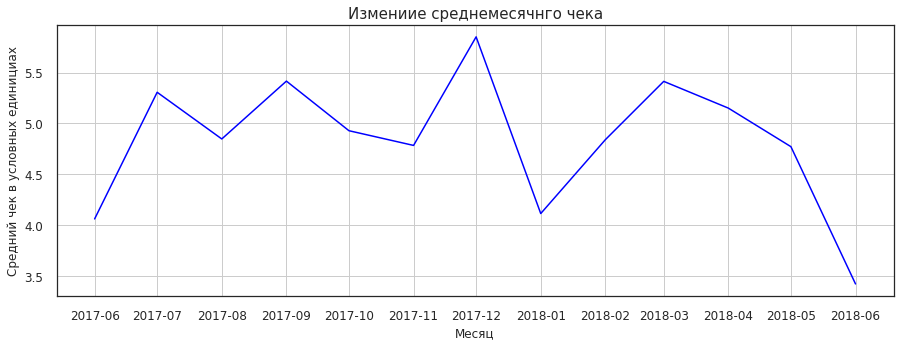

In [ ]:
# Создание фигуры
fig, axes1 = plt.subplots(figsize=(15, 5))

# График изменения среднего, дневного чека помесячно
axes1.plot('order_month', 'average_check', data=average_check, color='blue')
axes1.set_title('Измениие среднемесячнго чека', fontsize=15)
axes1.set_xlabel('Месяц', fontsize = 12)
axes1.set_ylabel('Средний чек в условных единициах', fontsize = 12)
axes1.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)

# Вывод диапазона значений по оси X c интервалом в 1 месяц
fmt_year = mdates.MonthLocator(interval=1)
axes1.xaxis.set_major_locator(fmt_year)
axes1.grid()


In [ ]:
print('Средний чек за весь период составил: {:.2f} у.е'.format(average_check['average_check'].mean()))

Средний чек за весь период составил: 4.84 у.е


**Вывод**
***
1. Средний чек за весь период составляет - 4.84 условных единиц.
2. Динамика изменения от месяца к месяцу скачкообразная:
    -  с июня 2017 г. средний чек начал рости и достиг пика в декабря 2017 на отметке 5.8 у.е. , рост составил 45 %. Можно утверждать, что в этот период были куплены самые дорогие билеты за весь исследуемый период.
    - далее падение с марта 2018 г. и до июня 2018 г. Средний стали ниже среднего - 3.5 у.е. 


**Оценка изменения "пожизенной ценности" клиентов**

1. Так как исследуемый период составляет год, то когорты мы будем строить по месяцам.  
2. Посчитаем суммурную выручку по каждой кагорте *(т.е. по первой дате покупки)* в разрезе каждого месяца покупки.
3. Подтянем данные по количеству покупателей в каждой кагорте.
4. Определим выловый доход и возраст когорты.
5. Расчитаем LTV
6. Построим сводную для нахождения среднего LTV с возрастом более 6 месяцев.
7. Визуализируем результаты.


Определим суммарную выручку по каждой кагорте в разрезе каждого месяца покупки.  
У нас отсались подготовленные таблицы с когортного анализа по средникм покупкам. Воспользуемся ими.

In [ ]:
cohorts_revenue = copy_orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohorts_revenue.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Подтянем данные по количеству пользователей каждой кагорты

In [ ]:
df_ltv_metrics = cohorts_revenue.merge(cohort_sizes, on='first_order_month')
df_ltv_metrics.head()

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


Определим валовый доход и возраст когорты.

In [ ]:
# Маржинальность из условия задачи
margin_rate = 1
df_ltv_metrics['gross_profit'] = df_ltv_metrics['revenue'] * margin_rate

In [ ]:
# Определение срока жизни: разность между текущем месяцем и первым месяцем покупки. 
df_ltv_metrics['age'] = (df_ltv_metrics['order_month'] - df_ltv_metrics['first_order_month']) / np.timedelta64(1,'M')
df_ltv_metrics['age'] = df_ltv_metrics['age'].round().astype('int')
df_ltv_metrics.head()

,first_order_month,order_month,revenue,n_buyers,gross_profit,age
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0
1,2017-06-01,2017-07-01,981.82,2023,981.82,1
2,2017-06-01,2017-08-01,885.34,2023,885.34,2
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4


Опеределим LTV

In [ ]:
df_ltv_metrics['ltv'] = df_ltv_metrics['gross_profit'] / df_ltv_metrics['n_buyers']
df_ltv_metrics.head()

,first_order_month,order_month,revenue,n_buyers,gross_profit,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531


In [ ]:
total_ltv = df_ltv_metrics.pivot_table(index = 'first_order_month',
                                       columns = 'age',
                                       values = 'ltv',
                                       aggfunc = 'mean').cumsum(axis=1)

total_ltv.index = total_ltv.index.strftime('%Y.%m.%d')


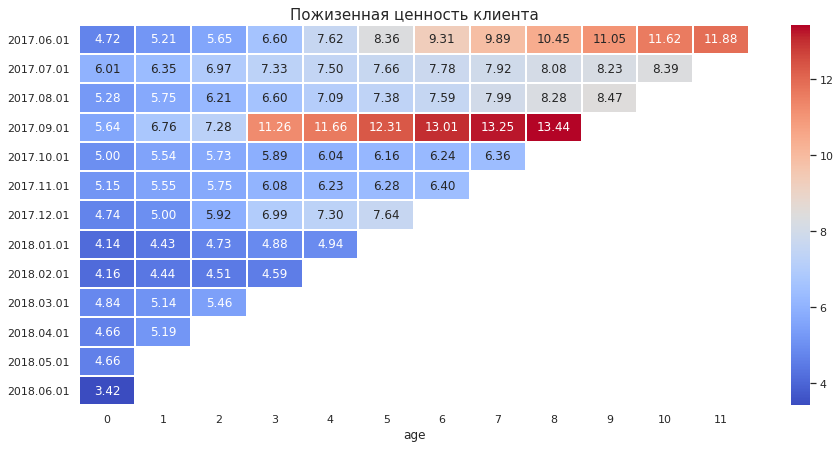

In [ ]:
# Тепловая карта отобржаение суммарного коэффициента удержания по "времени жизни"
sns.set(style='white')
plt.figure(figsize=(15, 7))
plt.title('Пожизенная ценность клиента', fontsize=15)
sns.heatmap(total_ltv, annot=True,  fmt=".2f", linewidths=1, cmap='coolwarm');

In [ ]:
print('средний LTV на 6-й месяц жизни когорты: {:.2f}'.format(total_ltv.mean(axis=0)[5]))

средний LTV на 6-й месяц жизни когорты: 7.97


**Вывод**
***
1. В среднем, один клиент приносит 7.97 у.е., при условии его "жизни" в сервисе более 6 месяцев. 
2. Самый большой вклад внесли кагорты за июнь и сентябрь 2017 г.

<a id='marketing_metrics'></a>
### Макретинговые метрики
***
**to do:**
1. Затраты на маркетинг: всего, по источникам, изменение во времени
2. Опеределение среднего CAC на одного покупателя в целом за период
3. Опеределение основного источника для каждого покупателя;
4. Расчет среднего CAC по каждому источнику.
5. Расчет LTV по каждому иточнику;
6. Опеределение ROMI по каждому источнику.


**Определение общих затрат и затрат по каждому источнику трафика**
***

In [ ]:
costs_by_source = df_costs.pivot_table(index = 'source_id',
                                       values='costs',
                                       aggfunc='sum',
                                       margins=True)
costs_by_source.sort_values(by='costs', ascending=False).round()

,costs
source_id,
All,329132.0
3,141322.0
4,61074.0
5,51757.0
2,42806.0
1,20833.0
10,5822.0
9,5517.0


In [ ]:
print('Общие затраты сервиса, за исследуемый период: {:.0f} у.е'.format(df_costs['costs'].sum()))

Общие затраты сервиса, за исследуемый период: 329132 у.е


**Вывод**
***
1. Наибольший бюджет заложен на развитие 3 источника - 141322 у.е., что составляет 43 %, от общего бюджета реклманой кампании.
2. Источники со средним бюджетов - от 40000 до 60000 у.e. - 2, 4,5. 
3. Источники с низким бюджетом до 20000 у.е. - 1, 9, 10, их доля составила не более 6 %.

Посмотрим как изменеяются суммарные затраты от месяца к месяцу.  
Для этого выделим месяца по дате рекламной компании.

In [ ]:
df_costs['costs_month'] = df_costs['dt'].astype('datetime64[M]')
df_costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [ ]:
# Определение суммы затрат за каждый месяц рекламной кампании, в разрезе исчтоника
costs_by_source = df_costs.groupby(['costs_month', 'source_id'])['costs'].sum().reset_index()

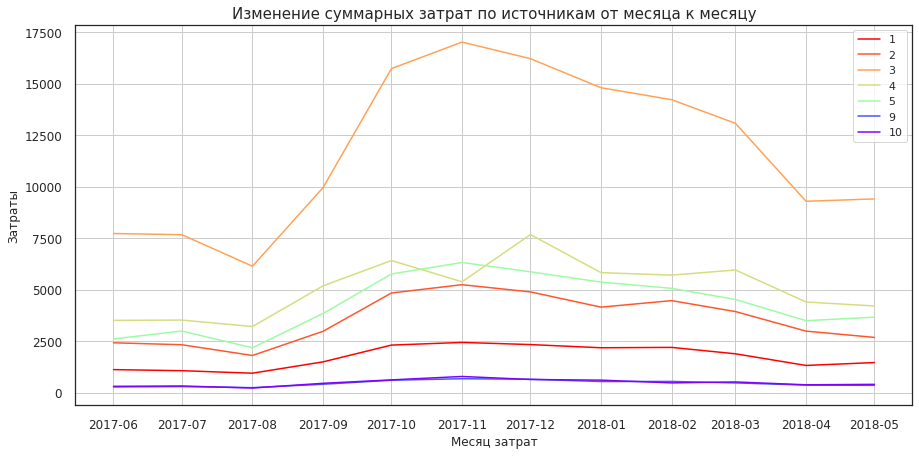

In [ ]:
# График изменения суммарных затрат по каждому источнику, от месяца к месяцу
line,ax = plt.subplots(figsize=(15,7))

# График изменения суммарных затрат по каждому источнику, от месяца к месяцу
ax = sns.lineplot(data=costs_by_source, x='costs_month', y='costs', hue='source_id', palette="rainbow_r")
ax.set_title('Изменение суммарных затрат по источникам от месяца к месяцу', fontsize=15)
ax.set_xlabel ('Месяц затрат', fontsize=12)
ax.set_ylabel ('Затраты', fontsize=12)
ax.legend(costs_by_source['source_id'].unique())
ax.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)

# Вывод диапазона значений по оси X c интервалом в 1 месяц
fmt_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_year)
ax.grid()


**Вывод**
***
1. Из графика изменения общих затрат по всем исчтоникам можно выделить тенденцию роста начиная с августа 2018 г. заканчивая в мае 2018 г. Можно предположить, что закладвывалось увеличение бюджета на год.  
По исчтоникам:
- С самым низким бюджетом:
    - **9** и **10** увеличение бюджета практически не закладывли, отмечается незначительный рост с 625 до 650.
    -  **1** увеличение затрат произошло в 2 раза - с 1250 до 2500.
- Со средним бюджетом:
    - **2**, **5** увеличение затрат произошло в 2 раза - с 2500 до 5000.
    - **4** увеличение затрат произошло в 3 раза - с 2500 до 7000.
- С высоким бюджетом:
    - **3** - источник, на который возложили большие надежды. Его суммарные затраты самые большие и их увеличение произошло в 2 раза - с 6250 до 16250.

**Расчет показателя CAC для всего проекта**
***

Просуммируем данны по месяцу затрат.
Далее подтянем количество **пользователей совершивших покупку**.  
Почему именно этих пользователей, а не общее количество *(визиты без покупок)* ?  

Показатель CAC определяет эффективность затрат на рекламу и используется при расчетах показателя ROMI, а значит мы имеем ввиду только клиентов, которые принесли деньги.  
Така как для анализа CAC мы не используем кагортный анализ, то подтягивать данные будем по ключу `order_month/costs_month`

In [ ]:
costs_by_period = df_costs.groupby('costs_month')['costs'].sum().reset_index()
costs_by_period.columns = ['month', 'total_costs']
costs_by_period

,month,total_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [ ]:
count_buyers = df_orders.groupby('order_month')['uid'].nunique().reset_index()
count_buyers.columns = ['month', 'n_buyers']
count_buyers

,month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1984
2,2017-08-01,1472
3,2017-09-01,2750
4,2017-10-01,4675
5,2017-11-01,4547
6,2017-12-01,4942
7,2018-01-01,3898
8,2018-02-01,4258
9,2018-03-01,4181


In [ ]:
# Объединение таблицы с затратами и количеством пользователей
df_cac_metrics = pd.merge(costs_by_period,
                          count_buyers,
                          on='month',
                          how='inner')
df_cac_metrics.head()

,month,total_costs,n_buyers
0,2017-06-01,18015.00,2023
1,2017-07-01,18240.59,1984
2,2017-08-01,14790.54,1472
3,2017-09-01,24368.91,2750
4,2017-10-01,36322.88,4675


In [ ]:
df_cac_metrics['cac'] = df_cac_metrics['total_costs'] / df_cac_metrics['n_buyers']
df_cac_metrics.head()

,month,total_costs,n_buyers,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1984,9.193846
2,2017-08-01,14790.54,1472,10.047921
3,2017-09-01,24368.91,2750,8.861422
4,2017-10-01,36322.88,4675,7.769600


In [ ]:
print('Средний CAC на одного пользователя: {:.2f} у.е.'.format(df_cac_metrics['total_costs'].sum() / df_cac_metrics['n_buyers'].sum()))

Средний CAC на одного пользователя: 8.02 у.е.


**Вывод**
***
На одного пользователя приходится 8.02 у.е. затрат.  
В сравнении с тем, что пользователь в среднем от своих покупок приносит vtymit  - 7.97 можно сдлеать вывод, что сайт не окупается. Более точные выводы можно сделать на этапе расчте ROMI.

**Опеределение главного источника пользователя**
***
Основным будем считать тот, с которого клиент зашел в первый раз.

In [ ]:
filtered_by_source = df_visits[df_visits['start_ts'] == df_visits['first_activity_date']][['source_id', 'uid']]

Объединим таблицу `filtered_by_source` c `copy_orders`, чтобы определить количество пользователей, совершивших покупку в разрезе источника. Напомним, `copy_orders` - таблица, где уже произведены приведения даты для выполнения будущих расчетов.  

Итоговая таблица понадобиться для нахождения LTV и ROMI в разрезе источника.

In [ ]:
orders_in_source = pd.merge(copy_orders, filtered_by_source, on='uid', how='left')
orders_in_source.head()

,buy_ts,revenue,uid,order_month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3


**Расчет CAC по каждому источнику**
***

Посчитаем количество клиентов по каждому месяцу, в разрезе источника трафика.

In [ ]:
count_users_by_source = orders_in_source.groupby(['order_month','source_id']).agg({'uid':'nunique'}).reset_index()
count_users_by_source.columns = ['order_month','source_id','n_buyers']
count_users_by_source.head()

,order_month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Для расчета CAC мы не применяем когортный анализ, поэтому объединение будем делать по месяцу проведения рекламной кампании.

In [ ]:
costs_by_source = df_costs.groupby(['costs_month','source_id'])['costs'].sum().reset_index()
costs_by_source.head()

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [ ]:
# Объединение таблицы с затратами в разрезе источника и количество пользователей по каждому источнику.
df_cac_metrics_by_source = pd.merge(costs_by_source,
                                    count_users_by_source,
                                    left_on=['costs_month','source_id'],
                                    right_on=['order_month','source_id'],
                                    how='inner')
df_cac_metrics_by_source['cac'] = df_cac_metrics_by_source['costs'] / df_cac_metrics_by_source['n_buyers']
df_cac_metrics_by_source.head(20)

,costs_month,source_id,costs,order_month,n_buyers,cac
0,2017-06-01,1,1125.61,2017-06-01,190,5.924263
1,2017-06-01,2,2427.38,2017-06-01,235,10.329277
2,2017-06-01,3,7731.65,2017-06-01,638,12.118574
3,2017-06-01,4,3514.80,2017-06-01,413,8.510412
4,2017-06-01,5,2616.12,2017-06-01,384,6.812813
5,2017-06-01,9,285.22,2017-06-01,68,4.194412
6,2017-06-01,10,314.22,2017-06-01,95,3.307579
7,2017-07-01,1,1072.88,2017-07-01,176,6.095909
8,2017-07-01,2,2333.11,2017-07-01,216,10.801435
9,2017-07-01,3,7674.37,2017-07-01,525,14.617848


Построим сводную, чтобы опеределить средний CAC по месяцам, в разрезе каждого источника

In [ ]:
avg_cac_by_source = df_cac_metrics_by_source.pivot_table(index='costs_month',
                                                         columns = 'source_id',
                                                         values='cac',
                                                         aggfunc='mean').applymap(float)
avg_cac_by_source.index = avg_cac_by_source.index.strftime('%Y.%m.%d')

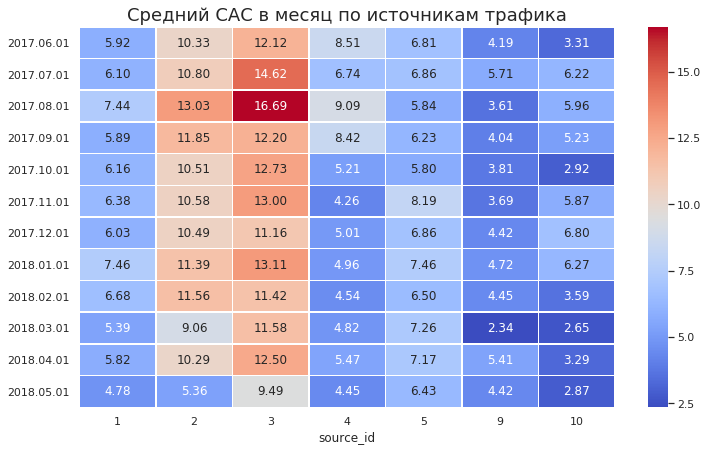

In [ ]:
# График изменения среднего CAC по месяцам, в разрезе источника трафика
plt.figure(figsize=(12, 7))
sns.set(style='white')
plt.title('Средний СAC в месяц по источникам трафика', fontsize=18)
sns.heatmap(avg_cac_by_source, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.show()

**Вывод**
***
1. Самые большие затраты на 1 пользователя приходятся на 2 и 3 источник по 10.5 и 12.5 у.е соответственно,  с топовым месяцам по затратам - август 2017г. Именно с этого месяца увеличился бюджет, но при этом увеличение притока пользователей еще не настало.
2. Наименьшие затраты на 1 пользователя приходятся на 9 и 10 источники, до 4.5 у.е.
3. Стоит обратить внимание на 1 источник, суммарные затрат по нему были одни из самых низких, при этом средний CAC оказался выше чем у 4 источника, тот у которого средний бюджет и увелиечеине за период произошло в 3 раза.  
Теорий много, можно предположить, что:
    -  4 источник может приносить определенное количество пользвоателей, без увеличения бюджета затрат.
    - или же 1 источник является эффективным по привлечению и без увеличения бюджета.
    - Можно предположить, что увеличение затрат на 4 источник было не оправданным и количество пользователей в течении года не увеличилось.
4. Определенно тенденции изменения показателя `CAC` от месяца к месяцу нет.

**Расчет ROMI по когортам в разрезе источников**
***

Расчитам LTV по каждому источнику.  
Так как мы проводим когортный анализ, то группировку будем делать по первому месяцу покупки.

In [ ]:
cohort_sizes_by_source = orders_in_source.groupby(['first_order_month', 'source_id']).agg({'uid':'nunique'}).reset_index()
cohort_sizes_by_source.columns = ['first_order_month', 'source_id', 'n_buyers']

Определим суммарную выручку по каждой кагорте, в разрезе  источника трафика.

In [ ]:
cohorts_revenue_by_source = orders_in_source.groupby(['first_order_month', 'order_month', 'source_id']).agg({'revenue':'sum'}).reset_index()
cohorts_revenue_by_source.head()

,first_order_month,order_month,source_id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


Подтянем данные по количеству покупателей по каждой кагорте и источнику.

In [ ]:
df_ltv_metrics_by_source = cohorts_revenue_by_source.merge(cohort_sizes_by_source, on=['first_order_month','source_id'])

Определим валовый доход

In [ ]:
df_ltv_metrics_by_source['gross_profit'] = df_ltv_metrics_by_source['revenue'] * margin_rate

Определим возраст когорты

In [ ]:
df_ltv_metrics_by_source['age'] = (df_ltv_metrics_by_source['order_month'] - df_ltv_metrics_by_source['first_order_month']) / np.timedelta64(1,'M')
df_ltv_metrics_by_source['age'] = df_ltv_metrics_by_source['age'].round().astype('int')
df_ltv_metrics_by_source.head()

,first_order_month,order_month,source_id,revenue,n_buyers,gross_profit,age
0,2017-06-01,2017-06-01,1,1378.70,190,1378.70,0
1,2017-06-01,2017-07-01,1,414.98,190,414.98,1
2,2017-06-01,2017-08-01,1,419.43,190,419.43,2
3,2017-06-01,2017-09-01,1,714.24,190,714.24,3
4,2017-06-01,2017-10-01,1,811.20,190,811.20,4


Расчет LTV

In [ ]:
df_ltv_metrics_by_source['ltv'] = df_ltv_metrics_by_source['gross_profit'] / df_ltv_metrics_by_source['n_buyers']
df_ltv_metrics_by_source.head()

,first_order_month,order_month,source_id,revenue,n_buyers,gross_profit,age,ltv
0,2017-06-01,2017-06-01,1,1378.70,190,1378.70,0,7.256316
1,2017-06-01,2017-07-01,1,414.98,190,414.98,1,2.184105
2,2017-06-01,2017-08-01,1,419.43,190,419.43,2,2.207526
3,2017-06-01,2017-09-01,1,714.24,190,714.24,3,3.759158
4,2017-06-01,2017-10-01,1,811.20,190,811.20,4,4.269474


Для расчета  ROMI подтянем данные по CAC

In [ ]:
df_romi_metrics_by_source = pd.merge(df_ltv_metrics_by_source,
                                     df_cac_metrics_by_source,
                                     left_on=['first_order_month', 'source_id'],
                                     right_on=['costs_month', 'source_id'],
                                     how='inner')

In [ ]:
df_romi_metrics_by_source['romi'] = df_romi_metrics_by_source['ltv'] / df_romi_metrics_by_source['cac']
df_romi_metrics_by_source.head()

,first_order_month,order_month_x,source_id,revenue,n_buyers_x,gross_profit,age,ltv,costs_month,costs,order_month_y,n_buyers_y,cac,romi
0,2017-06-01,2017-06-01,1,1378.70,190,1378.70,0,7.256316,2017-06-01,1125.61,2017-06-01,190,5.924263,1.224847
1,2017-06-01,2017-07-01,1,414.98,190,414.98,1,2.184105,2017-06-01,1125.61,2017-06-01,190,5.924263,0.368671
2,2017-06-01,2017-08-01,1,419.43,190,419.43,2,2.207526,2017-06-01,1125.61,2017-06-01,190,5.924263,0.372625
3,2017-06-01,2017-09-01,1,714.24,190,714.24,3,3.759158,2017-06-01,1125.61,2017-06-01,190,5.924263,0.634536
4,2017-06-01,2017-10-01,1,811.20,190,811.20,4,4.269474,2017-06-01,1125.61,2017-06-01,190,5.924263,0.720676


Напишем функцию для визуализации показателя ROMI по каждому источнику

In [ ]:
# Функция визуализации показателя ROMI, по каждому источнику,
# c использованием графика heatmap

def romi_heatmap(df, value):
    # Сохранение в отдельную переменную среза данных по основнмоу датасету
    output = df[df['source_id'] == value]

    # Cведение данных в когорты, с расчетом среднего ROMI
    report = output.pivot_table(index='first_order_month',
                                columns='age',
                                values='romi',
                                aggfunc='mean'
                                )
    report.index = report.index.strftime('%Y.%m.%d')

    # Визуализация результатов с испоьзованием накопительной суммы показателя ROMI
    plt.figure(figsize=(10, 5))
    sns.set(style='white')
    plt.title('ROMI по источнику: {}'.format(value), fontsize=18)
    sns.heatmap(report.cumsum(axis=1).round(2),
                annot=True,
                fmt=".2f", 
                linewidths=.5,
                cmap='coolwarm')
    plt.show()
    print('----------------------------------------------------------------------------------------------------------')
    print('Средняя окупаемость по всем кагортам')
    print(report.cumsum(axis=1).mean(axis=0))

Выделим источники в отдельный список.  
Запустим функцию через цикл по списку с источниками для быстрого построения графиков.

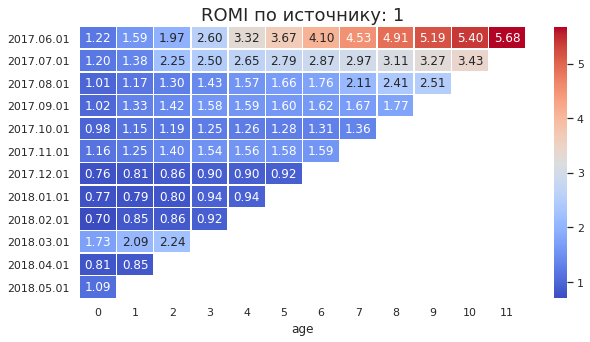

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0     1.037639
1     1.205029
2     1.429707
3     1.517446
4     1.724794
5     1.929423
6     2.207200
7     2.528628
8     3.050426
9     3.660214
10    4.412029
11    5.679045
dtype: float64


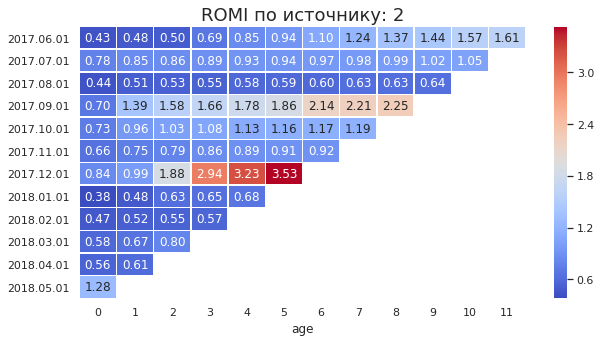

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0     0.654309
1     0.745308
2     0.914880
3     1.098379
4     1.259044
5     1.418685
6     1.149091
7     1.249955
8     1.312101
9     1.031103
10    1.310180
11    1.612957
dtype: float64


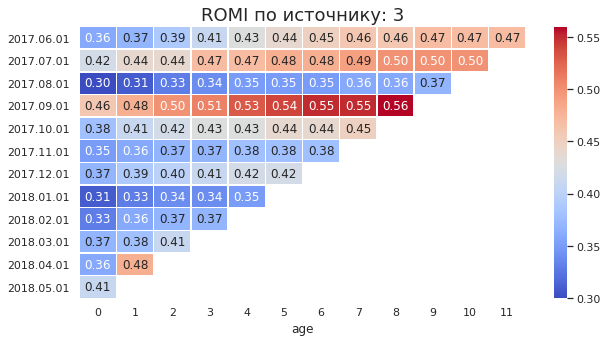

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0     0.369123
1     0.391098
2     0.397010
3     0.406520
4     0.419822
5     0.437062
6     0.444329
7     0.462182
8     0.471530
9     0.444051
10    0.485350
11    0.470834
dtype: float64


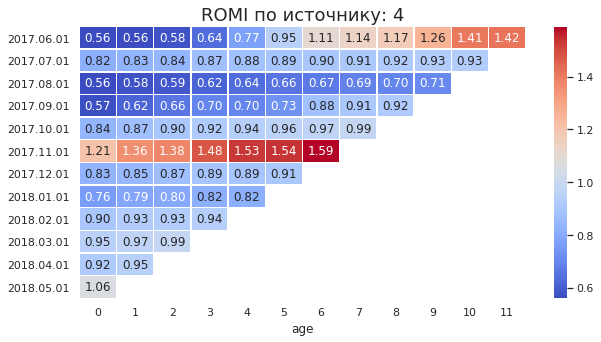

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0     0.831432
1     0.845883
2     0.854793
3     0.872953
4     0.895937
5     0.946230
6     1.020450
7     0.926876
8     0.925467
9     0.967624
10    1.171371
11    1.420471
dtype: float64


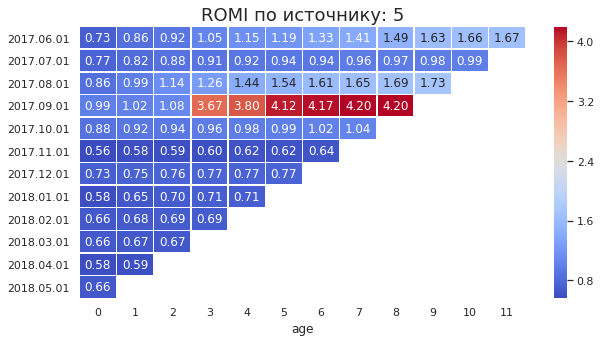

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0     0.722425
1     0.775570
2     0.837875
3     1.179267
4     1.298628
5     1.454980
6     1.615981
7     1.851747
8     2.089496
9     1.447675
10    1.322210
11    1.673333
dtype: float64


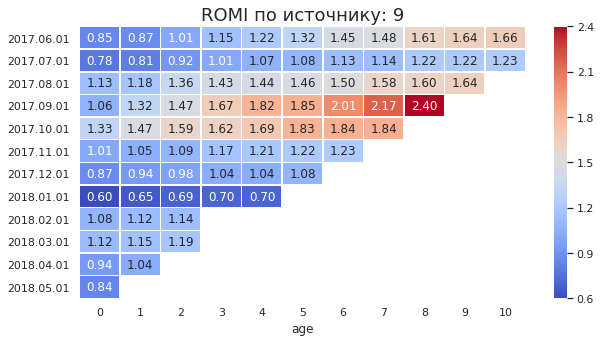

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0     0.968209
1     1.054405
2     1.143293
3     1.222572
4     1.274842
5     1.406703
6     1.524801
7     1.642675
8     1.705079
9     1.499720
10    1.444509
dtype: float64


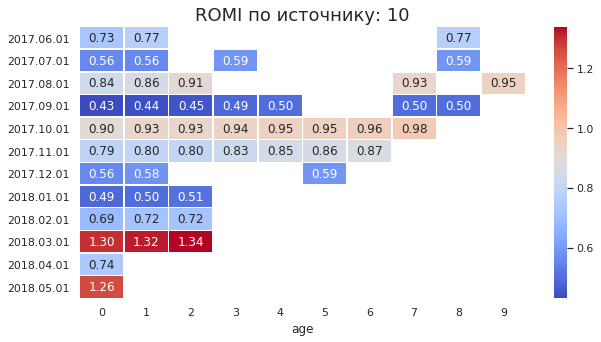

----------------------------------------------------------------------------------------------------------
Средняя окупаемость по всем кагортам
age
0    0.773552
1    0.746435
2    0.808914
3    0.710645
4    0.764562
5    0.798302
6    0.912454
7    0.802739
8    0.619214
9    0.948182
dtype: float64


In [ ]:
source_list = df_romi_metrics_by_source['source_id'].unique()
for i in source_list:
    romi_heatmap(df_romi_metrics_by_source, i)  

**Вывод**
***
Наш вывод будет строиться на последнем полугодии, то есть по периодам жизни более 6 месяцев. Так мы оценивали LTV, и именно этот период является последним в исследуемом периоде.
- **1 источник:** 8 когорт окупается с 1 месяца жизни.  
С 6 месяца и до конца периода показатель вырос в 2 раза: с 2.2. до 5.7.  
Самая эффективная когорта за июнь 2017 г.
- **2 источник:** в среднем окупаемость начинается с 3 месяца жизни.  
Наиболее эффетивные когорты за сентябрь и декабрь 2017 г.  
С 6 месяца жизни и до конца периода окупаемость увеличилась на 40%.
- **3 источник:** самый провальный, в него вложили много ресурсов, но не получили должный эффект.  
С 6 месяца жизни и до конца года изменений в окупаемости практически нет,медленно подходит к своей половине.
- **4 источник:** окупаемость здесь начинается с 6 месяцев.  
Cамой эффективная кагорта -  ноябрь 2017 г.  
С 6 месяца жизни и до конца года, окупаемость выросла на 40%.
- **5 источник:** окупаемость начинается с 3 месяца жизни.  
Самой эффеткивной является кагорта за сентябрь 2017 г.  
В среднем с 6 месяца жизни и до конца периода окупаемость осталась без изменений.  
Можно сказать, что этот источник лучше чем 3 и 4, но хуже 2. Так как окупаемость по нему перестала увеличиваться.
- **9 источник:** окупаемость начинается со 2 месяца жизин, наиболее эффективные кагорты за август, сентбярь, нобярь 2017 г.
- **10 источник:** неоднозначный источник.  
В среднем не окупается за 1 год, по многим периодам не было покупок.  
Стоит выделить март 2018 г. как самую перспективную кагорту.



<a id='fin'></a>
## Общий вывод
***
- По результаам расчетом различных метрик мы можем утверждать следующее:
    1.  Сервисом активно пользуются. Так, каждый день здесь появляется 908 новых пользователей. Начиная с августа 2017 и до мая 2018 г. прирост количества клиентов вырос и далее не уменьшался. Это объясняется проведением рекламных кампаний в этот период.
    2. Продолжительность типичной сессий составляет 1 минуту, такое же время пользователь тратит от начало сессий до совершения покупки. На основе этого мы сделали вывод, что в основном пользователь использует сервис для совершения покупки билета и меньше всего интересуется контентом. Следует порабоать с этим, возможно афишу читают в других местах, например соц.сетях.
    3. Коээфициент удержания составил 6.52 % - это низкий уровень(из 100 человек вернется 7). Это свзяано со спецификой сервиса, а именно - мероприятия и покупка билетов на них не такое частое являние как походы в магазин. Пользователь может купить билет на один концерт, а на другой пойти уже через 5 месяцев.
    4.  На 1 пользователя приходится 1.43 покупки, при условии, что пользователь пользуется сервисом уже 6 месяце. Среднемесячный чек составляет 4.84
    5. Пожизненная ценность с одного клиента составила -7,97 у.е, по тем пользователям которые живут в сервисе более 6 месяце. Средние затраты на одного клиента составили 8,02 у.е. То есть мы получаем меньше чем тратим на одного клиента. Это связано с проведением рекламной кампании и не доплучения ожидаемого эффекта от нее. Результаты ниже.
***

Вернемся как постановке задачи - нам необходимо было определить невыгодный источник трафика. 
- **Самые невыгодные:** 
    1. Мы отмечаем **3 источник** самым не эффективным - окупаемость инвестиций за 1 год не дсотилга даже своей половины.  При самом высоком бюджете, который достигает 43% от общего бюджета рекламной кампании.
    2. Следует также пересмотреть бюджет **4 источника**. Его окупаемость достигается лишь к 6 месяцам жизни. При этом уровень затрат на одного клиента у него меньше чем у исчтоников с наименьшим бюджетом.
- **Самые эффективные:**
    1. **1 источник** - самый успешный истчоник, который мы рекомендуем развивать. Его незначительный бюджет  - до 6% от общей доли, привел к высокой окупаемости по 8 когортам из 12 исследуемых, которая выросла за последние полгода в 2 раза.
    2. Не стоит скидывать со щитов и **9 источник**. Напомним, что рекламная кампания не планировала значительное увеличение бюджета по этому источнику, тем не менее окупаемость была достигута со 2 месяца жизни по 6 когортам из 12.
- **Самой перспективной кагортой** мы выделяем июнь 2017 г. - которая имеет самый выоский показатель средней  окупаемости и рсота за полгода в 2 раза. Именно эта кагорта показала самый высокий LTV на одного пользователя за 6 месяцев жизни. Это говорит о том, что пользователи этой когорты приносят болше выручки по отношению к другим кагортам, даже спустя 6 месяцев их нахождения в сервисе. А окупаемость в 1 исчтонике имееет тенденцию ростав.


